In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
file_path = "QT01/measurement 1/coincidence_rate_1.csv"
data = pd.read_csv(file_path, delimiter=";", decimal=',')

data = data.drop(columns=['Coincidence Rate (Hz) - T&A'])
data.rename(columns={'Detector A/B to T Delay (ns) - T&A': 'T Delay (ns)', 
                     'Coincidence Rate (Hz) - T&B': 'Coincidence Rate'}, 
            inplace=True)

In [3]:
data.head()

,T Delay (ns),Coincidence Rate
0,-8.0,0.0
1,-7.5,0.0
2,-7.0,0.0
3,-6.5,0.0
4,-6.0,0.0


In [4]:
def gaussian(x, amplitude, mean, sigma):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

def x_gaussian(mu, sigma, amplitude, y):
    return mu - sigma * np.sqrt(2 * np.log(amplitude/y)), mu + sigma * np.sqrt(2 * np.log(amplitude/y))

In [5]:
x_data = np.linspace(-8, 4, 100)

x = data['T Delay (ns)']
y_data = data['Coincidence Rate']

initial_guess = [80, -2, 1]
params, covariance = curve_fit(gaussian, x, y_data, p0=initial_guess)

fitted_amplitude, fitted_mean, fitted_sigma = params

y_fitted = gaussian(x_data, fitted_amplitude, fitted_mean, fitted_sigma)

In [6]:
fwhm = x_gaussian(fitted_mean, fitted_sigma, fitted_amplitude, fitted_amplitude/2)
print(fwhm, fitted_amplitude/2, abs(fwhm[0]-fwhm[1]))

(np.float64(-3.3722993169897584), np.float64(-0.9576008162084375)) 42.58284960820218 2.414698500781321


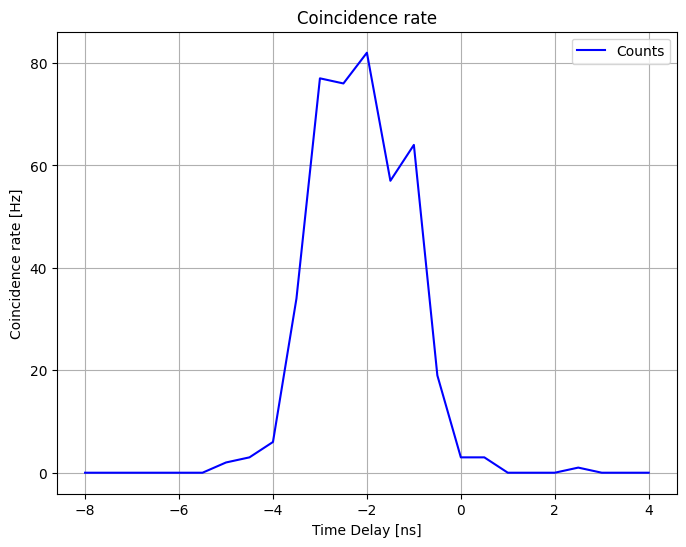

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(x, y_data, color='blue', label='Counts')
plt.title('Coincidence rate')
plt.xlabel('Time Delay [ns]')
plt.ylabel('Coincidence rate [Hz]')
plt.legend()
plt.grid()
plt.savefig('Coincidence_rate.png', dpi=300)


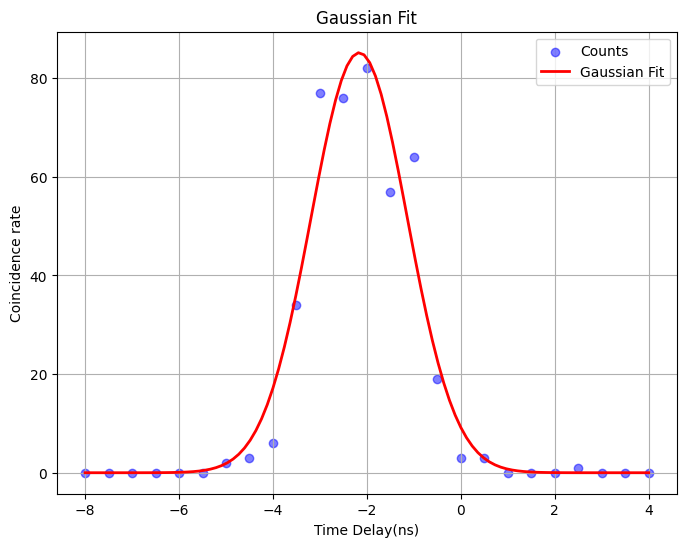

In [13]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 10,
        }

plt.figure(figsize=(8, 6))
plt.scatter(x, y_data, color='blue', label='Counts', alpha=0.5)
plt.plot(x_data, y_fitted, label='Gaussian Fit', color='red', linewidth=2)
# plt.axhline(y = fitted_amplitude/2, xmin = abs(fwhm[0]+8.5)/13, xmax = abs(fwhm[1]+8.5)/13)
# plt.text(-3.4, 37, r"$ FWHM = {:.2f}\ ns $".format(abs(fwhm[0]-fwhm[1])), fontdict=font)
plt.title('Gaussian Fit')
plt.xlabel('Time Delay(ns)')
plt.ylabel('Coincidence rate')
plt.legend()
plt.grid()
plt.savefig('Coincidence_rate_fit.png', dpi=300)
plt.show()

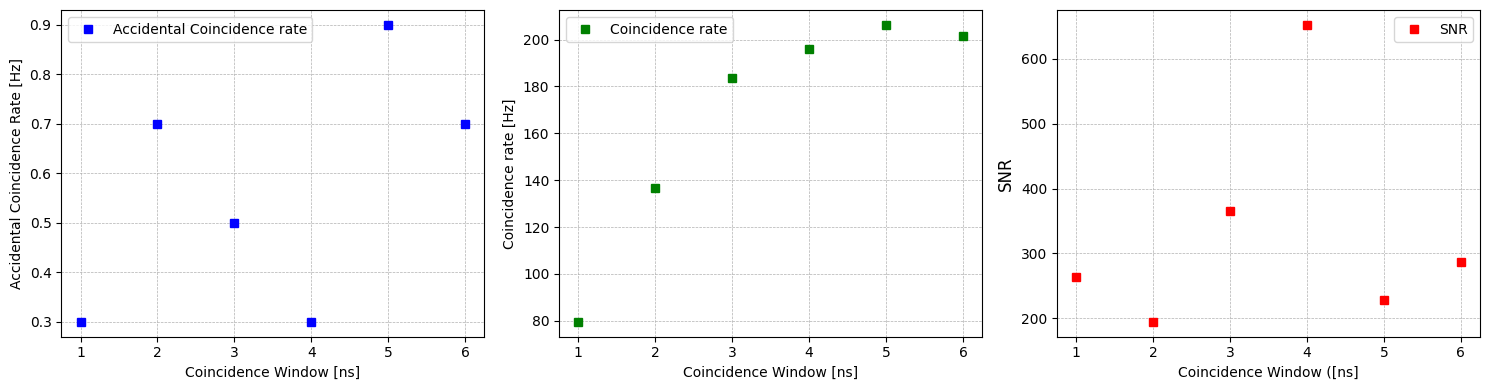

In [9]:
# Given data
coincidence_window = np.array([1, 2, 3, 4, 5, 6])  # in ns
experimental_acc_rate = np.array([0.3, 0.7, 0.5, 0.3, 0.9, 0.7])
coincidence_rate = [79.5, 136.8, 183.5, 196, 206.3, 201.7]

expected_acc_rate = np.array([0.16132572, 0.32101454, 0.4962183, 0.64510896, 0.751742, 0.93151848])
signal_noise_ratio = [(coincidence_rate[i] - experimental_acc_rate[i])/experimental_acc_rate[i] for i in range(6)]

# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns

axes[0].plot(coincidence_window, experimental_acc_rate, 's', label='Accidental Coincidence rate', color='blue')
axes[0].set_xlabel('Coincidence Window [ns]')
axes[0].set_ylabel('Accidental Coincidence Rate [Hz]')
# axes[0].set_title('Accidental Coincidence Rate vs Coincidence Window', fontsize=14)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0].legend(loc='best')


axes[1].plot(coincidence_window, coincidence_rate, 's', label='Coincidence rate', color='green')
axes[1].set_xlabel('Coincidence Window [ns]')
axes[1].set_ylabel('Coincidence rate [Hz]')
# axes[1].set_title('Coincidence rate vs Coincidence Window', fontsize=14)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].legend(loc='best')


axes[2].plot(coincidence_window, signal_noise_ratio, 's', label='SNR', color='red')
axes[2].set_xlabel('Coincidence Window ([ns]')
axes[2].set_ylabel('SNR', fontsize=12)
# axes[2].set_title('SNR vs Coincidence window', fontsize=14)
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[2].legend(loc='best')


plt.tight_layout()
plt.savefig('coincidence_window.png', dpi=300) 
plt.show()



In [10]:
coincidence_err = np.sqrt(coincidence_rate)
coincidence_err

array([ 8.91627725, 11.69615321, 13.54621718, 14.        , 14.36314729,
       14.20211252])

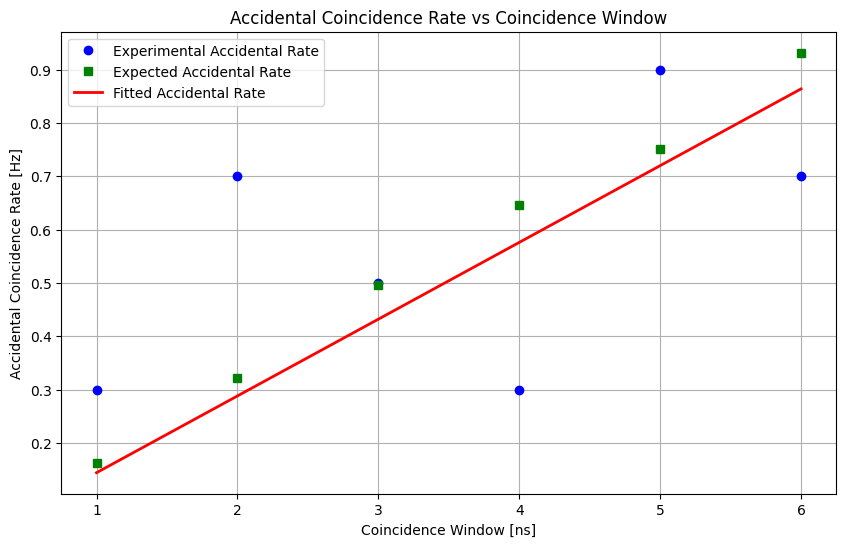

Fitted Parameters:
Rate 1: 0.41509195379892777
Rate 2: 0.34680086481260125


In [11]:

# Define the functional form for fitting
def coincidence_rate_func(window, rate_1, rate_2):
    return rate_1 * rate_2 * window

initial_guess = [0.1, 0.1]
params, covariance = curve_fit(coincidence_rate_func, coincidence_window, experimental_acc_rate, p0=initial_guess)

# Extract fitted parameters
fitted_rate_1, fitted_rate_2 = params

# Generate fitted curve
fitted_acc_rate = coincidence_rate_func(coincidence_window, fitted_rate_1, fitted_rate_2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(coincidence_window, experimental_acc_rate, 'o', label='Experimental Accidental Rate', color='blue')
plt.plot(coincidence_window, expected_acc_rate, 's', label='Expected Accidental Rate', color='green')
plt.plot(coincidence_window, fitted_acc_rate, '-', label='Fitted Accidental Rate', color='red', linewidth=2)
plt.xlabel('Coincidence Window [ns]')
plt.ylabel('Accidental Coincidence Rate [Hz]')
plt.title('Accidental Coincidence Rate vs Coincidence Window')
plt.legend()
plt.grid()
plt.savefig('expected_accidental_rate.png', dpi=300) 
plt.show()

# Print the fitted parameters
print(f"Fitted Parameters:")
print(f"Rate 1: {fitted_rate_1}")
print(f"Rate 2: {fitted_rate_2}")


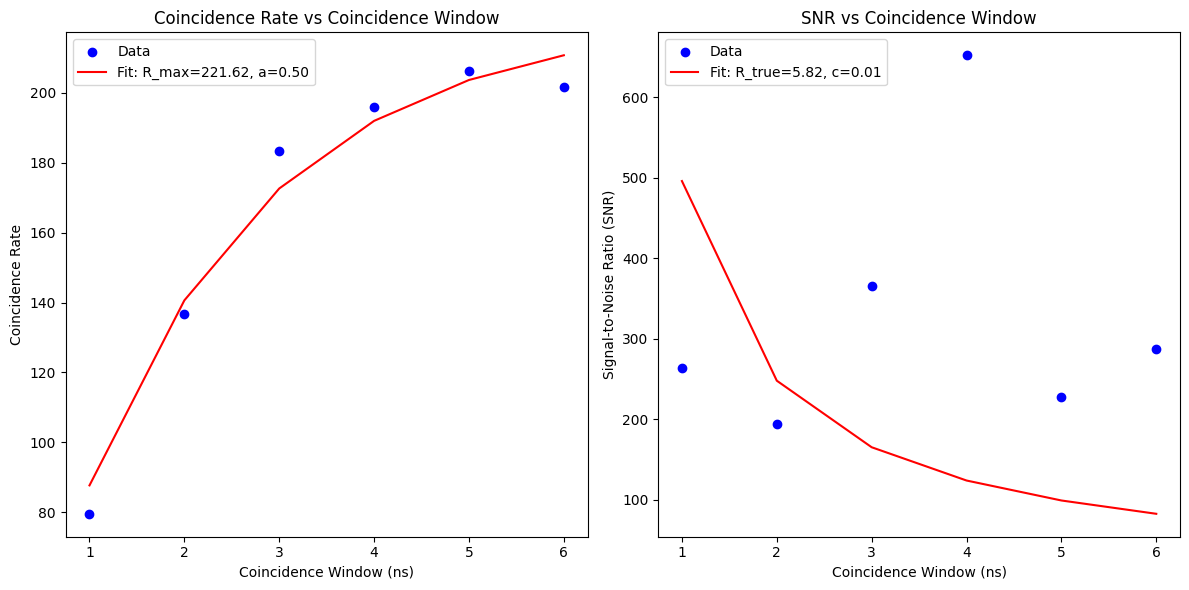

Fitted parameters for Coincidence Rate:
R_max = 221.62, a = 0.50

Fitted parameters for SNR:
R_true = 5.82, c = 0.01


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
coincidence_window = np.array([1, 2, 3, 4, 5, 6])  # in ns
experimental_acc_rate = np.array([0.3, 0.7, 0.5, 0.3, 0.9, 0.7])
coincidence_rate = np.array([79.5, 136.8, 183.5, 196, 206.3, 201.7])
signal_noise_ratio = np.array([(coincidence_rate[i] - experimental_acc_rate[i]) / experimental_acc_rate[i] for i in range(6)])

# Coincidence rate functional form: saturating exponential
def coincidence_rate_model(W_c, R_max, a):
    return R_max * (1 - np.exp(-a * W_c))

# SNR functional form: scaled inverse relation
def snr_model(W_c, R_true, c):
    return R_true / (c * W_c)

# Fitting coincidence rate vs coincidence window
popt_cr, pcov_cr = curve_fit(coincidence_rate_model, coincidence_window, coincidence_rate, p0=[210, 0.5])
R_max_cr, a_cr = popt_cr

# Fitting SNR vs coincidence window
popt_snr, pcov_snr = curve_fit(snr_model, coincidence_window, signal_noise_ratio)
R_true_snr, c_snr = popt_snr

# Plotting results
plt.figure(figsize=(12, 6))

# Coincidence rate plot
plt.subplot(1, 2, 1)
plt.scatter(coincidence_window, coincidence_rate, label='Data', color='blue')
plt.plot(coincidence_window, coincidence_rate_model(coincidence_window, *popt_cr), label=f'Fit: R_max={R_max_cr:.2f}, a={a_cr:.2f}', color='red')
plt.xlabel('Coincidence Window (ns)')
plt.ylabel('Coincidence Rate')
plt.title('Coincidence Rate vs Coincidence Window')
plt.legend()

# SNR plot
plt.subplot(1, 2, 2)
plt.scatter(coincidence_window, signal_noise_ratio, label='Data', color='blue')
plt.plot(coincidence_window, snr_model(coincidence_window, *popt_snr), label=f'Fit: R_true={R_true_snr:.2f}, c={c_snr:.2f}', color='red')
plt.xlabel('Coincidence Window (ns)')
plt.ylabel('Signal-to-Noise Ratio (SNR)')
plt.title('SNR vs Coincidence Window')
plt.legend()

plt.tight_layout()
plt.show()

# Print results
print("Fitted parameters for Coincidence Rate:")
print(f"R_max = {R_max_cr:.2f}, a = {a_cr:.2f}")
print("\nFitted parameters for SNR:")
print(f"R_true = {R_true_snr:.2f}, c = {c_snr:.2f}")
